In [1]:
!pip install --upgrade tensorflow

In [2]:
# importing math & data processing libs
import pandas as pd
import numpy as np

# importing utils
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# importing drawing tools
import matplotlib.pyplot as plt

# importing NN wrapper lib
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Input

In [9]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Пример: загрузи данные, если ещё не загружены
df_mushrooms = pd.read_csv("mushrooms.csv")

# Выбираем признаки для анализа
x_data = df_mushrooms[["cap-shape", "cap-surface", "cap-color", "odor"]].copy()

# Преобразуем категориальные признаки в числа
label_encoders = {}
for column in x_data.columns:
    le = LabelEncoder()
    x_data[column] = le.fit_transform(x_data[column])
    label_encoders[column] = le  # если нужно сохранить для обратного преобразования

# Считаем среднее и стандартное отклонение
print(f"x_data MEAN:\n{x_data.mean()}\n")
print(f"x_data STD:\n{x_data.std()}")


x_data MEAN:
cap-shape      3.348104
cap-surface    1.827671
cap-color      4.504677
odor           4.144756
dtype: float64

x_data STD:
cap-shape      1.604329
cap-surface    1.229873
cap-color      2.545821
odor           2.103729
dtype: float64


In [11]:
# Центруємо (віднімаємо середнє)
x_data = x_data - x_data.mean(axis=0)

# Масштабуємо (ділимо на стандартне відхилення)
x_data = x_data / x_data.std(axis=0)

# Перевіряємо результат
print(f"x_data MEAN:\n{x_data.mean()}\n")
print(f"x_data STD:\n{x_data.std()}")


x_data MEAN:
cap-shape      1.539334e-16
cap-surface    2.798790e-17
cap-color     -5.597579e-17
odor           2.099092e-17
dtype: float64

x_data STD:
cap-shape      1.0
cap-surface    1.0
cap-color      1.0
odor           1.0
dtype: float64


In [12]:
x_data

,cap-shape,cap-surface,cap-color,odor
0,1.029649,0.140119,-0.198238,0.881883
1,1.029649,0.140119,1.765765,-1.970195
2,-2.086919,0.140119,1.372965,-0.544156
3,1.029649,0.953212,1.372965,0.881883
4,1.029649,0.140119,-0.591038,0.406537
...,...,...,...,...
8119,-0.216978,0.140119,-0.198238,0.406537
8120,1.029649,0.140119,-0.198238,0.406537
8121,-0.840292,0.140119,-0.198238,0.406537
8122,-0.216978,0.953212,-0.198238,1.832576


In [13]:
# Кодування міток класу: съедобный = 0, ядовитый = 1
class_mapping = {"e": 0, "p": 1}
df_mushrooms["class_num"] = [class_mapping[val_] for val_ in df_mushrooms["class"]]

# One-hot-encoding (наприклад, для нейронної мережі)
y = to_categorical(df_mushrooms["class_num"], 2)


In [14]:
y

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y, test_size=0.2, random_state=42)

Train try #1

In [21]:
model = Sequential([
    Input(shape=(4, )),
    Dense(2, activation='softmax')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 2)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10 (40.00 B)

 Trainable params: 10 (40.00 B)

 Non-trainable params: 0 (0.00 B)

In [22]:
initial_lr = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_lr,
    decay_steps=100, # Decay the learning rate every 10000 steps
    decay_rate=1 # Multiply learning rate by 0.9 every decay_steps
)

# Instantiate the optimizer with the schedule
optimizer_with_schedule = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# Compile the model
model.compile(
    optimizer=optimizer_with_schedule,
    loss="categorical_crossentropy",
    metrics=["accuracy", "f1_score"]
)

In [23]:
stat = model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    batch_size=25,
    epochs=100
)
history = stat.history


Epoch 1/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - accuracy: 0.5323 - f1_score: 0.5092 - loss: 0.7144 - val_accuracy: 0.5188 - val_f1_score: 0.5130 - val_loss: 0.6702
Epoch 2/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 265us/step - accuracy: 0.5387 - f1_score: 0.5281 - loss: 0.6655 - val_accuracy: 0.5477 - val_f1_score: 0.5477 - val_loss: 0.6676
Epoch 3/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 262us/step - accuracy: 0.5494 - f1_score: 0.5078 - loss: 0.6667 - val_accuracy: 0.5705 - val_f1_score: 0.5701 - val_loss: 0.6663
Epoch 4/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step - accuracy: 0.5575 - f1_score: 0.4873 - loss: 0.6669 - val_accuracy: 0.5268 - val_f1_score: 0.5199 - val_loss: 0.6692
Epoch 5/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - accuracy: 0.5347 - f1_score: 0.4924 - loss: 0.6718 - val_accuracy: 0.5342 - val_f1_score: 0.5323 - val_loss: 0.6709
Epoch 6/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step - accuracy: 0.5441 - f1_score: 0.5213 - loss: 0.6668 - val_accuracy: 0.5440 - va

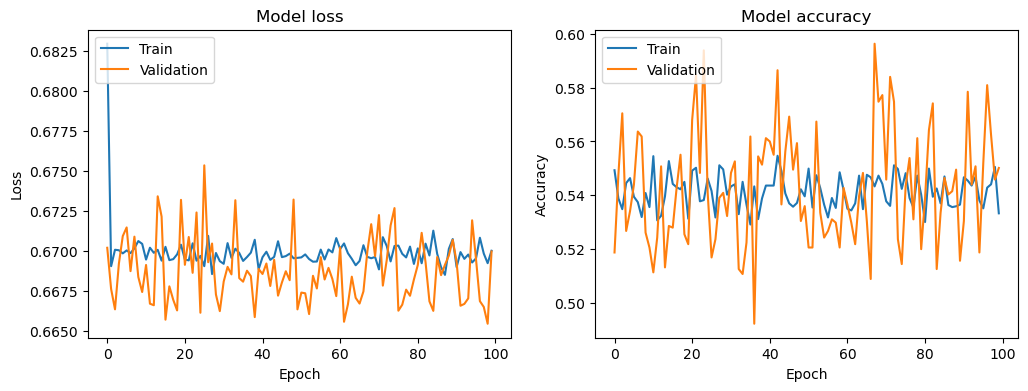

In [24]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


Try 2 lr = 0.3

In [26]:
model = Sequential([
    Input(shape=(4, )),
    Dense(2, activation='softmax')
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 2)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10 (40.00 B)

 Trainable params: 10 (40.00 B)

 Non-trainable params: 0 (0.00 B)

In [27]:
initial_lr = 0.3
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_lr,
    decay_steps=100, # Decay the learning rate every 10000 steps
    decay_rate=1 # Multiply learning rate by 0.9 every decay_steps
)

# Instantiate the optimizer with the schedule
optimizer_with_schedule = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# Compile the model
model.compile(
    optimizer=optimizer_with_schedule,
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [28]:
stat = model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    batch_size=25,
    epochs=100
)
history = stat.history


Epoch 1/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - accuracy: 0.5510 - loss: 0.7573 - val_accuracy: 0.5231 - val_loss: 0.7986
Epoch 2/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 262us/step - accuracy: 0.5369 - loss: 0.7388 - val_accuracy: 0.4806 - val_loss: 0.7397
Epoch 3/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - accuracy: 0.5598 - loss: 0.7478 - val_accuracy: 0.6074 - val_loss: 0.7016
Epoch 4/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step - accuracy: 0.5676 - loss: 0.7350 - val_accuracy: 0.5317 - val_loss: 0.7510
Epoch 5/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step - accuracy: 0.5679 - loss: 0.7286 - val_accuracy: 0.5058 - val_loss: 0.7033
Epoch 6/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step - accuracy: 0.5559 - loss: 0.7302 - val_accuracy: 0.5612 - val_loss: 0.6837
Epoch 7/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step - accuracy: 0.5549 - loss: 0.7303 - val_accuracy: 0.5828 - val_loss: 0.7474
Epoch 8/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 227us/step - accuracy: 0.5615 - loss: 0

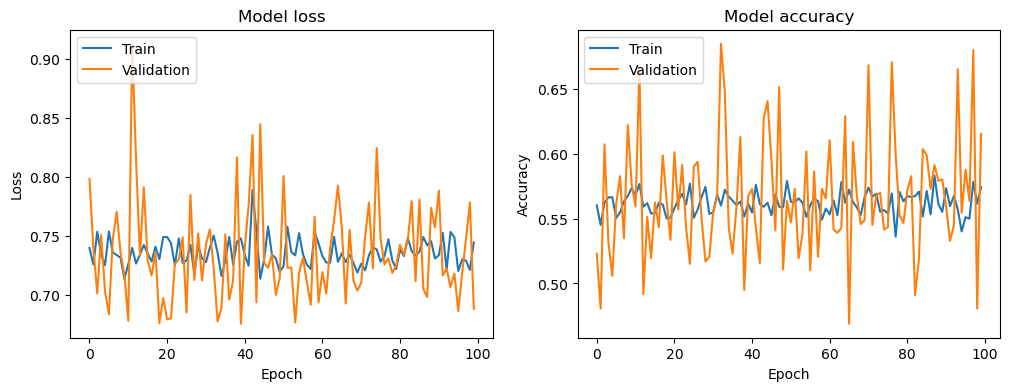

In [29]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [30]:
model = Sequential([
    Input(shape=(4, )),
    Dense(2, activation='softmax')
])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 2)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10 (40.00 B)

 Trainable params: 10 (40.00 B)

 Non-trainable params: 0 (0.00 B)

In [31]:
initial_lr = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_lr,
    decay_steps=100, # Decay the learning rate every 10000 steps
    decay_rate=1 # Multiply learning rate by 0.9 every decay_steps
)

# Instantiate the optimizer with the schedule
optimizer_with_schedule = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# Compile the model
model.compile(
    optimizer=optimizer_with_schedule,
    loss="categorical_crossentropy",
    metrics=["accuracy", ]
)

In [32]:
stat = model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    batch_size=25,
    epochs=100
)
history = stat.history

Epoch 1/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - accuracy: 0.5712 - loss: 0.7170 - val_accuracy: 0.5982 - val_loss: 0.6766
Epoch 2/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - accuracy: 0.5949 - loss: 0.6746 - val_accuracy: 0.5489 - val_loss: 0.6665
Epoch 3/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step - accuracy: 0.5409 - loss: 0.6669 - val_accuracy: 0.5274 - val_loss: 0.6656
Epoch 4/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 252us/step - accuracy: 0.5322 - loss: 0.6607 - val_accuracy: 0.5200 - val_loss: 0.6662
Epoch 5/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step - accuracy: 0.5246 - loss: 0.6669 - val_accuracy: 0.5200 - val_loss: 0.6661
Epoch 6/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step - accuracy: 0.5273 - loss: 0.6649 - val_accuracy: 0.5286 - val_loss: 0.6662
Epoch 7/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step - accuracy: 0.5264 - loss: 0.6667 - val_accuracy: 0.5157 - val_loss: 0.6662
Epoch 8/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step - accuracy: 0.5075 - loss: 0

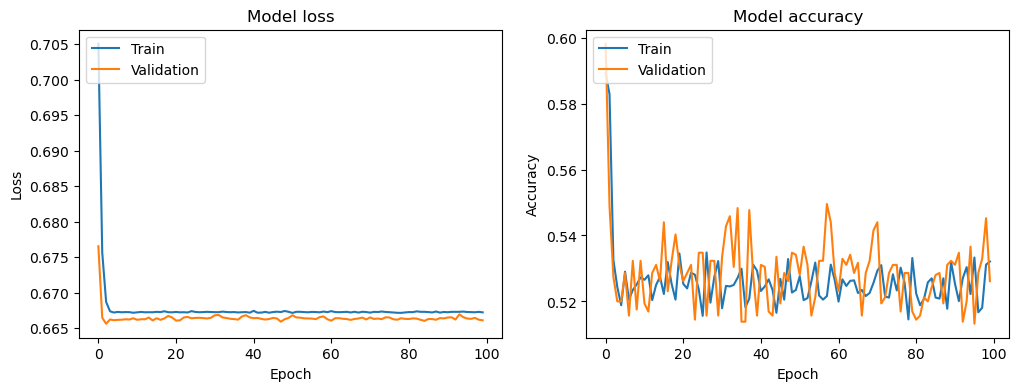

In [33]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [34]:
model = Sequential([
    Input(shape=(4, )),
    Dense(1, activation='relu'),
    Dense(2, activation='softmax'),
])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 1)              │             5 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [35]:
initial_lr = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_lr,
    decay_steps=100, # Decay the learning rate every 10000 steps
    decay_rate=1 # Multiply learning rate by 0.9 every decay_steps
)

# Instantiate the optimizer with the schedule
optimizer_with_schedule = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# Compile the model
model.compile(
    optimizer=optimizer_with_schedule,
    loss="categorical_crossentropy",
    metrics=["accuracy", ]
)

In [36]:
stat = model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    batch_size=25,
    epochs=100
)
history = stat.history

Epoch 1/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step - accuracy: 0.5787 - loss: 0.6978 - val_accuracy: 0.6942 - val_loss: 0.5604
Epoch 2/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step - accuracy: 0.6837 - loss: 0.5618 - val_accuracy: 0.6942 - val_loss: 0.5479
Epoch 3/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step - accuracy: 0.6868 - loss: 0.5547 - val_accuracy: 0.6942 - val_loss: 0.5463
Epoch 4/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step - accuracy: 0.6792 - loss: 0.5525 - val_accuracy: 0.6942 - val_loss: 0.5449
Epoch 5/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step - accuracy: 0.6970 - loss: 0.5455 - val_accuracy: 0.6948 - val_loss: 0.5446
Epoch 6/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step - accuracy: 0.6833 - loss: 0.5471 - val_accuracy: 0.6960 - val_loss: 0.5441
Epoch 7/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step - accuracy: 0.6967 - loss: 0.5442 - val_accuracy: 0.6929 - val_loss: 0.5441
Epoch 8/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step - accuracy: 0.6871 - loss: 0

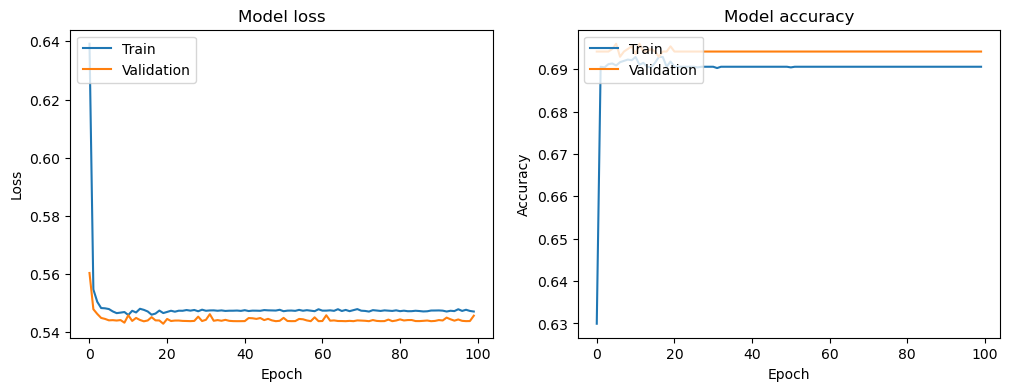

In [37]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [42]:
model = Sequential([
    Input(shape=(4, )),
    Dense(10, activation='relu'),
    Dense(2, activation='softmax'),
])

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 72 (288.00 B)

 Trainable params: 72 (288.00 B)

 Non-trainable params: 0 (0.00 B)

In [43]:
initial_lr = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_lr,
    decay_steps=100, # Decay the learning rate every 10000 steps
    decay_rate=1 # Multiply learning rate by 0.9 every decay_steps
)

# Instantiate the optimizer with the schedule
optimizer_with_schedule = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# Compile the model
model.compile(
    optimizer=optimizer_with_schedule,
    loss="categorical_crossentropy",
    metrics=["accuracy", ]
)

In [44]:
stat = model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    batch_size=25,
    epochs=100
)
history = stat.history

Epoch 1/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - accuracy: 0.8164 - loss: 0.4858 - val_accuracy: 0.9077 - val_loss: 0.2526
Epoch 2/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step - accuracy: 0.9264 - loss: 0.2179 - val_accuracy: 0.9686 - val_loss: 0.1826
Epoch 3/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step - accuracy: 0.9605 - loss: 0.1566 - val_accuracy: 0.9452 - val_loss: 0.1611
Epoch 4/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step - accuracy: 0.9664 - loss: 0.1431 - val_accuracy: 0.9551 - val_loss: 0.1397
Epoch 5/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step - accuracy: 0.9678 - loss: 0.1168 - val_accuracy: 0.9662 - val_loss: 0.1109
Epoch 6/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step - accuracy: 0.9720 - loss: 0.0974 - val_accuracy: 0.9668 - val_loss: 0.0954
Epoch 7/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step - accuracy: 0.9739 - loss: 0.0792 - val_accuracy: 0.9631 - val_loss: 0.0898
Epoch 8/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step - accuracy: 0.9786 - loss: 0

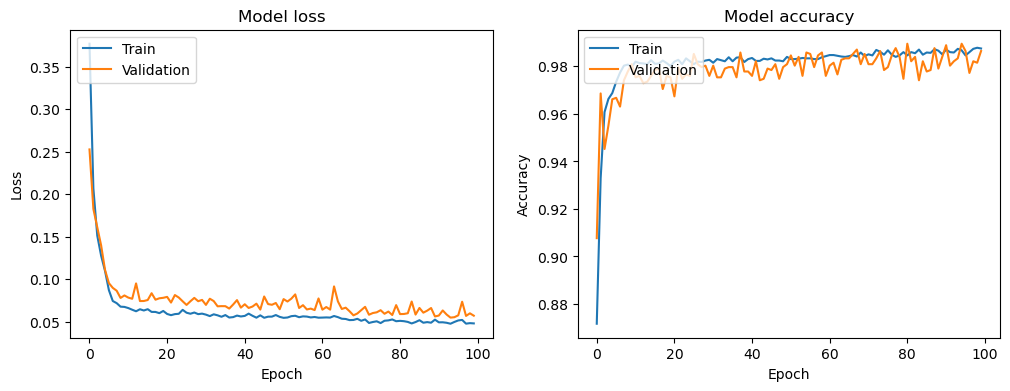

In [45]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [49]:
model = Sequential([
    Input(shape=(4, )),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(2, activation='softmax'),
])

model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 100)            │           500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 2)              │           202 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,002 (121.10 KB)

 Trainable params: 31,002 (121.10 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
initial_lr = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_lr,
    decay_steps=100, # Decay the learning rate every 10000 steps
    decay_rate=1 # Multiply learning rate by 0.9 every decay_steps
)

# Instantiate the optimizer with the schedule
optimizer_with_schedule = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# Compile the model
model.compile(
    optimizer=optimizer_with_schedule,
    loss="categorical_crossentropy",
    metrics=["accuracy", ]
)

In [51]:
stat = model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    batch_size=25,
    epochs=100
)
history = stat.history

Epoch 1/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - accuracy: 0.8654 - loss: 0.2852 - val_accuracy: 0.8855 - val_loss: 0.2642
Epoch 2/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - accuracy: 0.9469 - loss: 0.1483 - val_accuracy: 0.9766 - val_loss: 0.0717
Epoch 3/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - accuracy: 0.9825 - loss: 0.0615 - val_accuracy: 0.9871 - val_loss: 0.0562
Epoch 4/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - accuracy: 0.9884 - loss: 0.0427 - val_accuracy: 0.9828 - val_loss: 0.0539
Epoch 5/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - accuracy: 0.9864 - loss: 0.0430 - val_accuracy: 0.9828 - val_loss: 0.0534
Epoch 6/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - accuracy: 0.9861 - loss: 0.0486 - val_accuracy: 0.9551 - val_loss: 0.1493
Epoch 7/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - accuracy: 0.9757 - loss: 0.0845 - val_accuracy: 0.9791 - val_loss: 0.0805
Epoch 8/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - accuracy: 0.9806 - loss: 0

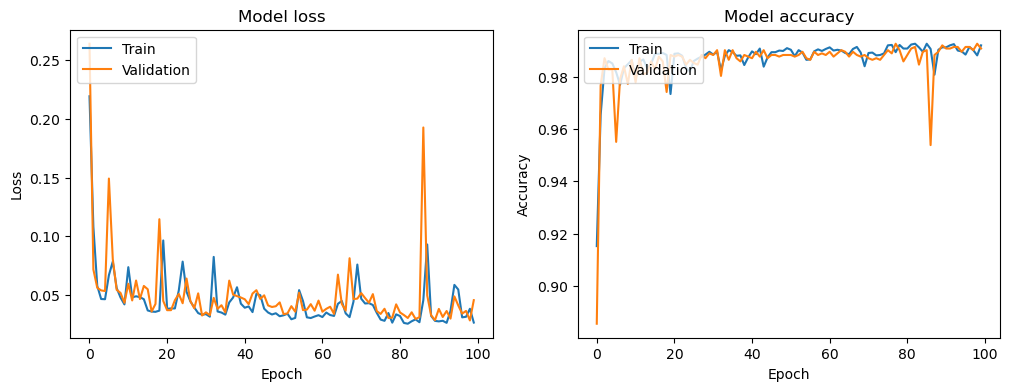

In [52]:
# Plot training & validation loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [53]:
model = Sequential([
    Input(shape=(4, )),
    Dense(10, activation='sigmoid'),
    Dense(2, activation='softmax'),
])

model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 2)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 72 (288.00 B)

 Trainable params: 72 (288.00 B)

 Non-trainable params: 0 (0.00 B)

In [54]:
initial_lr = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_lr,
    decay_steps=100, # Decay the learning rate every 10000 steps
    decay_rate=1 # Multiply learning rate by 0.9 every decay_steps
)

# Instantiate the optimizer with the schedule
optimizer_with_schedule = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# Compile the model
model.compile(
    optimizer=optimizer_with_schedule,
    loss="categorical_crossentropy",
    metrics=["accuracy", ]
)

In [55]:
stat = model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    batch_size=25,
    epochs=100
)
history = stat.history

Epoch 1/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - accuracy: 0.5571 - loss: 0.6912 - val_accuracy: 0.5169 - val_loss: 0.6476
Epoch 2/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step - accuracy: 0.5986 - loss: 0.6146 - val_accuracy: 0.9102 - val_loss: 0.4571
Epoch 3/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step - accuracy: 0.9064 - loss: 0.4038 - val_accuracy: 0.9182 - val_loss: 0.3023
Epoch 4/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step - accuracy: 0.9394 - loss: 0.2650 - val_accuracy: 0.9471 - val_loss: 0.2326
Epoch 5/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step - accuracy: 0.9576 - loss: 0.2145 - val_accuracy: 0.9600 - val_loss: 0.1998
Epoch 6/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step - accuracy: 0.9648 - loss: 0.1777 - val_accuracy: 0.9612 - val_loss: 0.1640
Epoch 7/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step - accuracy: 0.9671 - loss: 0.1499 - val_accuracy: 0.9686 - val_loss: 0.1420
Epoch 8/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step - accuracy: 0.9727 - loss: 0

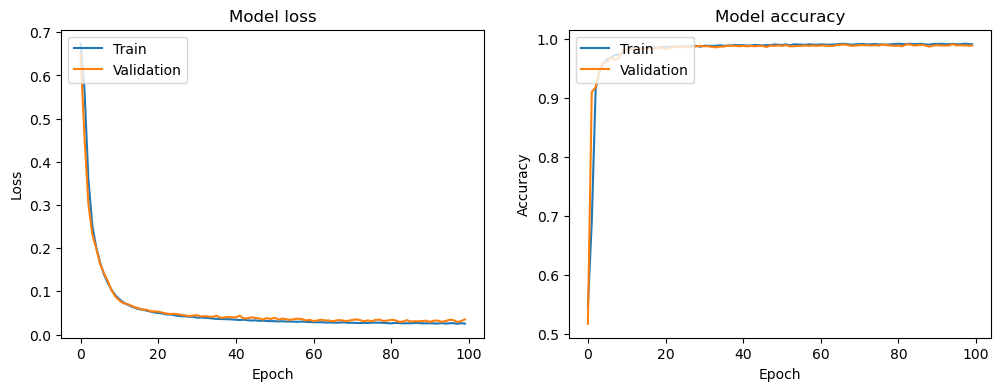

In [56]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [57]:
model = Sequential([
    Input(shape=(4, )),
    Dense(1, activation='tanh'),
    Dense(2, activation='softmax'),
])

model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 1)              │             5 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 2)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [58]:
# Define an initial learning rate and decay schedule
initial_lr = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_lr,
    decay_steps=100, # Decay the learning rate every 10000 steps
    decay_rate=1 # Multiply learning rate by 0.9 every decay_steps
)

# Instantiate the optimizer with the schedule
optimizer_with_schedule = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# Compile the model
model.compile(
    optimizer=optimizer_with_schedule,
    loss="categorical_crossentropy",
    metrics=["accuracy", ]
)

In [59]:
stat = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=25, epochs=100)
history = stat.history

Epoch 1/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - accuracy: 0.5697 - loss: 0.6779 - val_accuracy: 0.5895 - val_loss: 0.6645
Epoch 2/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step - accuracy: 0.5794 - loss: 0.6597 - val_accuracy: 0.5403 - val_loss: 0.6392
Epoch 3/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 249us/step - accuracy: 0.5753 - loss: 0.6267 - val_accuracy: 0.5914 - val_loss: 0.5998
Epoch 4/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step - accuracy: 0.6380 - loss: 0.5924 - val_accuracy: 0.6480 - val_loss: 0.5819
Epoch 5/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step - accuracy: 0.6651 - loss: 0.5791 - val_accuracy: 0.6695 - val_loss: 0.5742
Epoch 6/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - accuracy: 0.6715 - loss: 0.5702 - val_accuracy: 0.6652 - val_loss: 0.5705
Epoch 7/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step - accuracy: 0.6611 - loss: 0.5701 - val_accuracy: 0.6652 - val_loss: 0.5722
Epoch 8/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - accuracy: 0.6714 - loss: 0

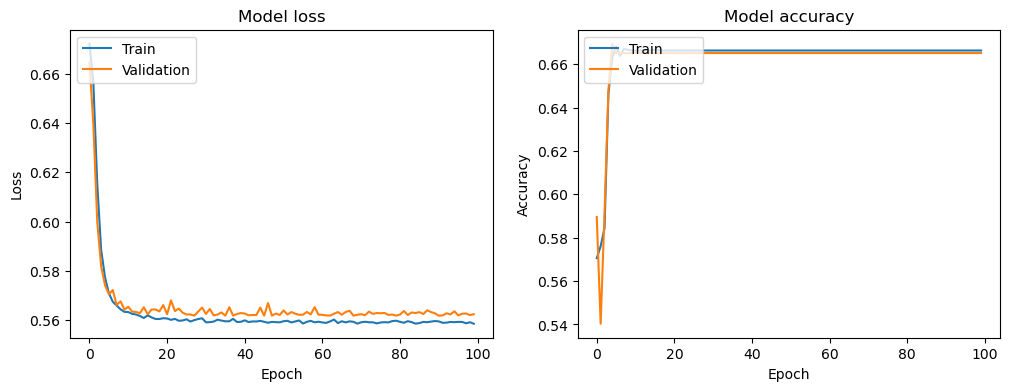

In [60]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()
